In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
plt.style.use(['science', 'notebook'])
from itertools import combinations

Define number of particles and get random positions (between 0 and 1) for each particle

In [40]:
n_particles = 16
r = np.random.random((2,n_particles))
# Color particles the start on either side
ixr = r[0]>0.5 #right
ixl = r[0]<=0.5 #left

Give IDs to each particle (this will come in handy later)

In [41]:
ids = np.arange(n_particles)

Plot initial configuration of particles

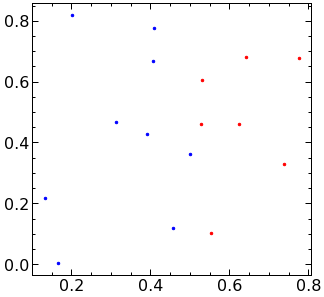

In [42]:
plt.figure(figsize=(5,5))
plt.scatter(r[0][ixr],r[1][ixr], color='r', s=6)
plt.scatter(r[0][ixl],r[1][ixl], color='b', s=6)

Obtain the initial velocities in the gas. We'll make the particles starting on the RHS move to the left at 500m/s and on the vice versa.

* **Note**: We're using the assumption that particles in a gas move at approximately 500m/s, thanks google.

In [43]:
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500

To run this simulation, we need to determine when two particles collide, and what the resulting final velocities will be.

# Part 1: Distance Between all Pairs

* To determine if two particles collide, we need to find the distance between **all pairs** of particles. If the distance is less than 2 times the radius of each particle, they collide. If there are $n$ particles, there are $n(n-1)/2$ pairs (combinatorics). To make this easier, we'll get pairs of particle IDs.

In [44]:
ids_pairs = np.asarray(list(combinations(ids,2)))
ids_pairs

array([[ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  4],
       [ 0,  5],
       [ 0,  6],
       [ 0,  7],
       [ 0,  8],
       [ 0,  9],
       [ 0, 10],
       [ 0, 11],
       [ 0, 12],
       [ 0, 13],
       [ 0, 14],
       [ 0, 15],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 1, 11],
       [ 1, 12],
       [ 1, 13],
       [ 1, 14],
       [ 1, 15],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 2, 11],
       [ 2, 12],
       [ 2, 13],
       [ 2, 14],
       [ 2, 15],
       [ 3,  4],
       [ 3,  5],
       [ 3,  6],
       [ 3,  7],
       [ 3,  8],
       [ 3,  9],
       [ 3, 10],
       [ 3, 11],
       [ 3, 12],
       [ 3, 13],
       [ 3, 14],
       [ 3, 15],
       [ 4,  5],
       [ 4,  6],
       [ 4,  7],
       [ 4,  8],
       [ 4,  9

We can obtain distances between particles in a similar fashion

* First get the pairs of x-positions of all particles

In [45]:
x_pairs = np.asarray(list(combinations(r[0],2)))
x_pairs

array([[0.49933565, 0.77561466],
       [0.49933565, 0.52699193],
       [0.49933565, 0.31364623],
       [0.49933565, 0.55463916],
       [0.49933565, 0.40926665],
       [0.49933565, 0.39123562],
       [0.49933565, 0.45682861],
       [0.49933565, 0.13379506],
       [0.49933565, 0.40710839],
       [0.49933565, 0.73873508],
       [0.49933565, 0.64314611],
       [0.49933565, 0.16580246],
       [0.49933565, 0.52967437],
       [0.49933565, 0.20286087],
       [0.49933565, 0.62540561],
       [0.77561466, 0.52699193],
       [0.77561466, 0.31364623],
       [0.77561466, 0.55463916],
       [0.77561466, 0.40926665],
       [0.77561466, 0.39123562],
       [0.77561466, 0.45682861],
       [0.77561466, 0.13379506],
       [0.77561466, 0.40710839],
       [0.77561466, 0.73873508],
       [0.77561466, 0.64314611],
       [0.77561466, 0.16580246],
       [0.77561466, 0.52967437],
       [0.77561466, 0.20286087],
       [0.77561466, 0.62540561],
       [0.52699193, 0.31364623],
       [0.

* Then take the difference to get $\Delta x_{ij}$ of all pairs

In [46]:
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dx_pairs

array([ 0.27627901,  0.02765628, -0.18568942,  0.0553035 , -0.090069  ,
       -0.10810003, -0.04250704, -0.36554059, -0.09222727,  0.23939943,
        0.14381046, -0.3335332 ,  0.03033871, -0.29647478,  0.12606996,
       -0.24862273, -0.46196843, -0.2209755 , -0.36634801, -0.38437904,
       -0.31878605, -0.6418196 , -0.36850628, -0.03687958, -0.13246855,
       -0.60981221, -0.24594029, -0.57275379, -0.15020905, -0.2133457 ,
        0.02764722, -0.11772528, -0.13575631, -0.07016332, -0.39319687,
       -0.11988355,  0.21174315,  0.11615418, -0.36118948,  0.00268243,
       -0.32413106,  0.09841368,  0.24099292,  0.09562042,  0.07758939,
        0.14318238, -0.17985117,  0.09346215,  0.42508885,  0.32949987,
       -0.14784378,  0.21602813, -0.11078537,  0.31175938, -0.14537251,
       -0.16340354, -0.09781054, -0.4208441 , -0.14753077,  0.18409593,
        0.08850695, -0.3888367 , -0.02496479, -0.35177829,  0.07076645,
       -0.01803103,  0.04756196, -0.27547159, -0.00215826,  0.32

The total distance is just $d_{ij}= \sqrt{\Delta x_{ij}^2 + \Delta y_{ij}^2}$. Since there are $n(n-1)/2$ pairs, there will be $n(n-1)/2$ different values of $d_{ij}$.

In [47]:
x_pairs = np.asarray(list(combinations(r[0],2)))
y_pairs = np.asarray(list(combinations(r[1],2)))
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dy_pairs = np.diff(y_pairs, axis=1).ravel()
d_pairs = np.sqrt(dx_pairs**2 + dy_pairs**2)
d_pairs

array([0.42012821, 0.10333724, 0.21472688, 0.26288666, 0.42410117,
       0.12650135, 0.24589389, 0.39215166, 0.31908645, 0.24158027,
       0.34956931, 0.48748727, 0.24673789, 0.54456236, 0.16075572,
       0.32996453, 0.50691419, 0.61461081, 0.37920814, 0.45896655,
       0.64325016, 0.78877069, 0.36867165, 0.35083957, 0.13248534,
       0.90747045, 0.25616271, 0.58968118, 0.26372299, 0.21350559,
       0.3576416 , 0.33614786, 0.1399162 , 0.34888757, 0.46147265,
       0.23825774, 0.24949405, 0.24794098, 0.58100686, 0.14532269,
       0.48235244, 0.09841384, 0.43724187, 0.32116255, 0.0882873 ,
       0.37817433, 0.30782977, 0.21862324, 0.44761717, 0.39115482,
       0.48637072, 0.2558265 , 0.36611811, 0.31186421, 0.68698749,
       0.36171923, 0.09892568, 0.43627563, 0.58149724, 0.2904201 ,
       0.58238608, 0.40112443, 0.50248984, 0.7957636 , 0.36369835,
       0.34918872, 0.65833887, 0.62087937, 0.1089806 , 0.55515054,
       0.25274282, 0.80752913, 0.20796382, 0.21070697, 0.38176

# Part 2: Velocities of a Collision

So at each iteration of the simulation, we will evaluate `d_pairs`, and if any of the distances between particles is less than $2r$, then a collision occurs. What is the final velocity of each of the two spheres? In an elastic collision (conservation of energy + momentum + angular momentum), one can show

$$\vec{v}_1^{\text{new}} = \vec{v}_1 - \frac{(\vec{v}_1 - \vec{v}_2) \cdot (\vec{r}_1 - \vec{r}_2)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_1 - \vec{r}_2)$$
$$\vec{v}_2^{\text{new}} = \vec{v}_2 - \frac{(\vec{v}_2 - \vec{v}_1) \cdot (\vec{r}_2 - \vec{r}_1)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_2 - \vec{r}_1)$$

In [48]:
radius = 0.06
ids_pairs_collide = ids_pairs[d_pairs < 2*radius]
ids_pairs_collide

array([[ 0,  2],
       [ 2, 15],
       [ 3,  6],
       [ 4,  7],
       [ 5,  9]])

We will call all the particles in the left column "1" and the right column "2"

In [52]:
v1 = v[:,ids_pairs_collide[:,0]]
v2 = v[:,ids_pairs_collide[:,1]]
r1 = r[:,ids_pairs_collide[:,0]]
r2 = r[:,ids_pairs_collide[:,1]]

Then we can compute the new velocity:

In [59]:
v1new = v1 - np.diag((v1-v2).T@(r1-r2))/np.sum((r1-r2)**2, axis=0) * (r1-r2)
v2new = v2 - np.diag((v2-v1).T@(r2-r1))/np.sum((r2-r1)**2, axis=0) * (r2-r1)

# Part 3: Functions to Run the Simulation

Here we define some functions that will help make running the simulation easier.

In [62]:
def get_delta_pairs(x):
    return np.diff(np.asarray(list(combinations(x,2))), axis=1).ravel()

def get_deltad_pairs(r):
    return np.sqrt(get_delta_pairs(r[0])**2 + get_delta_pairs(r[1])**2)

def compute_new_v(v1, v2, r1, r2):
    v1new = v1 - np.diag((v1-v2).T@(r1-r2))/np.sum((r1-r2)**2, axis=0) * (r1-r2)
    v2new = v2 - np.diag((v2-v1).T@(r2-r1))/np.sum((r2-r1)**2, axis=0) * (r2-r1)
    return v1new, v2new

def motion(r, v, id_pairs, ts, dt, d_cutoff):
    rs = np.zeros((ts, r.shape[0], r.shape[1]))
    vs = np.zeros((ts, v.shape[0], v.shape[1]))
    # Initial State
    rs[0] = r.copy()
    vs[0] = v.copy()
    for i in range(1,ts):
        ic = id_pairs[get_deltad_pairs(r) < d_cutoff]
        v[:,ic[:,0]], v[:,ic[:,1]] = compute_new_v(v[:,ic[:,0]], v[:,ic[:,1]], r[:,ic[:,0]], r[:,ic[:,1]])
        
        v[0,r[0]>1] = -np.abs(v[0,r[0]>1])
        v[0,r[0]<0] = np.abs(v[0,r[0]<0])
        v[1,r[1]>1] = -np.abs(v[1,r[1]>1])
        v[1,r[1]<0] = np.abs(v[1,r[1]<0])
        
        r = r + v*dt
        rs[i] = r.copy()
        vs[i] = v.copy()
    return rs, vs

Set the radius and find the position of all particles as a function of time (3D array `rs` where each axis is $(t,x,y)$).

In [63]:
radius = 0.06
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

Plot red and blue circles, making sure each is the correct size.

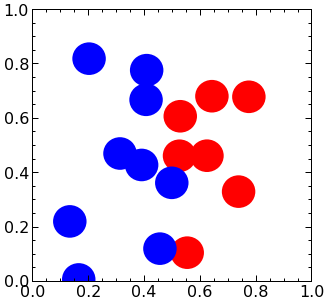

In [64]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xred, yred = rs[0][0][ixr], rs[0][1][ixr]
xblue, yblue = rs[0][0][ixl],rs[0][1][ixl]
circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
ax.add_collection(cred)
ax.add_collection(cblue)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

Make initial animation of the simulation

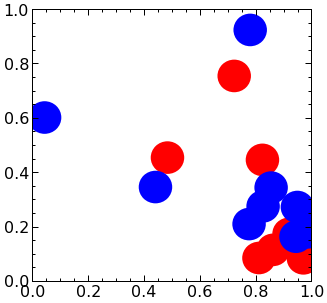

In [66]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

def animate(i):
    ax.clear()
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani3.gif',writer='pillow',fps=30,dpi=100)

Now that we're sure that it works, lets make a simulation containing many more particles

In [67]:
n_particles = 400
r = np.random.random((2,n_particles))
ixr = r[0]>0.5 
ixl = r[0]<=0.5 
ids = np.arange(n_particles)
ids_pairs = np.asarray(list(combinations(ids,2)))
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500
radius = 0.0015
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

Make an animation

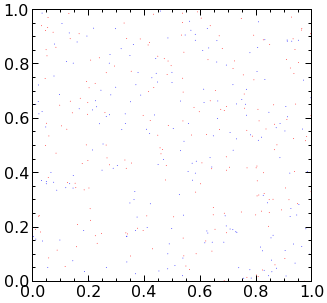

In [68]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani3.gif',writer='pillow',fps=30,dpi=100)

Let's look at the final velocity distribution of the particles and compare it to Maxwell-Boltzmann in 2 Dimensions:

* $kT = KE_{avg} = \frac{1}{2}m\bar{v^2} \implies \boxed{\frac{m}{kT} = \frac{2}{\bar{v^2}}}$
* $\boxed{f(v) = \frac{m}{kT} v \exp\left(-\frac{m}{kT}\frac{v^2}{2} \right)}$

In [69]:
v = np.linspace(0, 2000, 1000)
a = 2/500**2
fv = a*v*np.exp(-a*v**2 / 2)

Plot the final histogram next to this curve:

Text(0, 0.5, '# Particles')

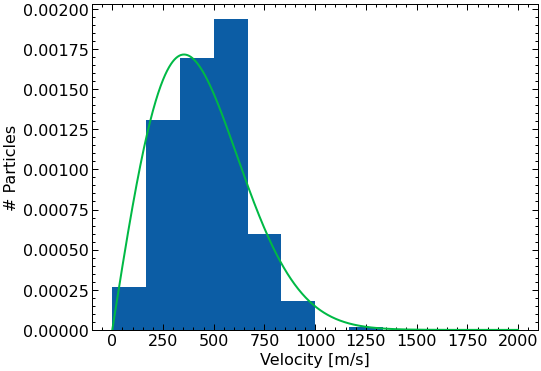

In [76]:
bins = np.linspace(0,1500,10)
plt.figure()
plt.hist(np.sqrt(np.sum(vs[400]**2, axis=0)), bins=bins, density=True)
plt.plot(v,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')

Finally, we can make an animation of the particles moving around and the histogram at the same time

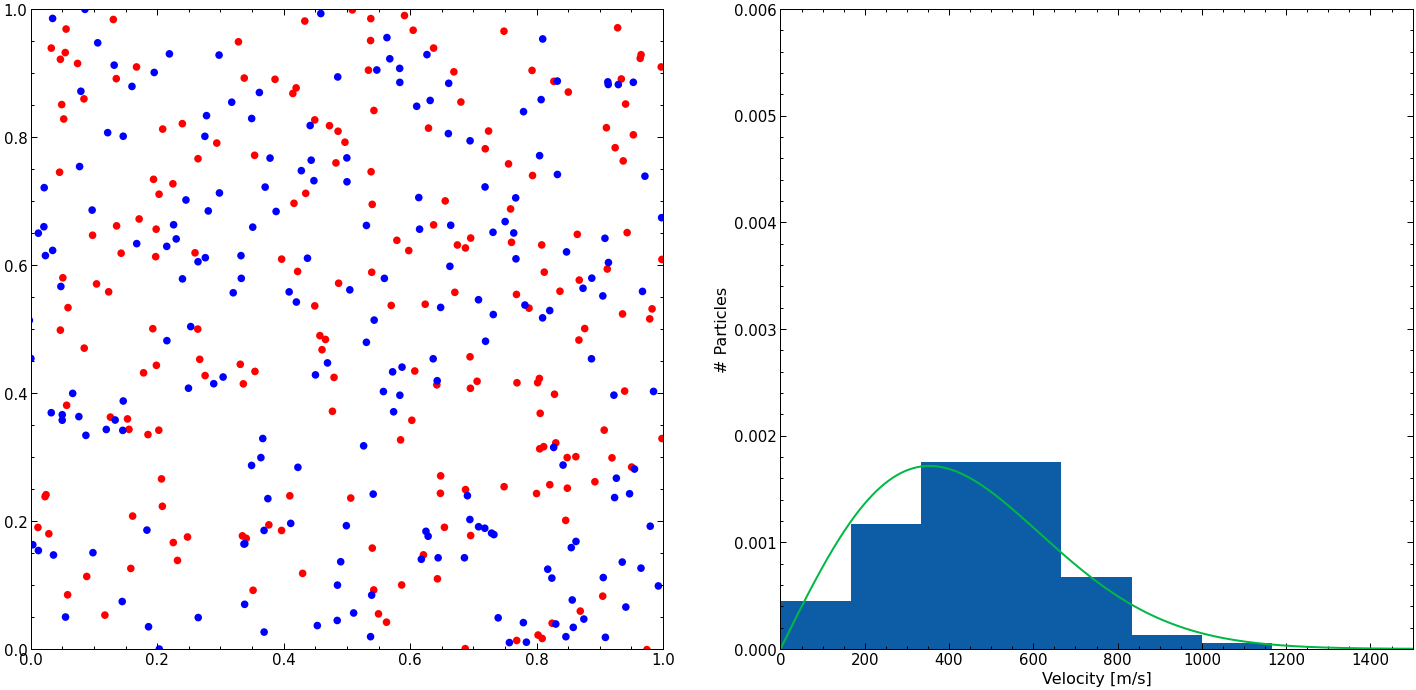

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

def animate(i):
    [ax.clear() for ax in axes]
    ax = axes[0]
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax = axes[1]
    ax.hist(np.sqrt(np.sum(vs[i]**2, axis=0)), bins=bins, density=True)
    ax.plot(v,fv)
    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('# Particles')
    ax.set_xlim(0,1500)
    ax.set_ylim(0,0.006)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    fig.tight_layout()
    
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani.gif',writer='pillow',fps=30,dpi=100)